#Exploration de données/Préparation de données

In [4]:
#Importer library
import pandas as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import numpy as np
# Les autres librairies du tout moins utiles
#import plotly.express as px



Avec colab, nous pouvons importer nos données dans google drive ou localement.

Données: une donnée est une description élémentaire, souvent codée, d'une chose, d'une transaction d'affaire, d'un événement, etc.



In [5]:
import pandas as pd

# Charger le fichier CSV en spécifiant le délimiteur de tabulation
try:
    data = pd.read_csv('/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/Classeur_EDA.csv', delimiter=';', encoding='latin-1')
except pd.errors.ParserError:
    print("ParserError: Skipping problematic lines.")
    data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet fin formation/Classeur_EDA.csv', delimiter=';', encoding='latin-1', error_bad_lines=False)

print(data.columns)
data.head(20)


Index(['NÂ', 'Localite', 'Longitude', 'Latitude', 'Prof_Tle', 'Debit'], dtype='object')


,NÂ,Localite,Longitude,Latitude,Prof_Tle,Debit
0,1,GARO,"00Â°03'5""E","11Â°02'5""",34,"10,28"
1,2,SAFOBE,"00Â°07'4""E","11Â°02'4""",41,"6,8"
2,3,NASSABLE,"00Â°07'2""E","11Â°01'4""","44,5","1,2"
3,4,TONGA,"00Â°02'5""E","11Â°00'3""","37,1","10,28"
4,5,TIMBOU,"00Â°06'4""E","11Â°01'4""",44,8
5,6,CINKASSE CENTRE,"00Â°02'2""E","11Â°05'5""","41,6","5,2"
6,7,TABI,"00Â°04'3""E","11Â°05'5""","32,6","3,6"
7,8,TCHIMBIANGBONGUE,"00Â°06'3""E","10Â°59'3""","56,65","1,7"
8,9,DATOULONTE,"00Â°07'5""E","10Â°59'2""","35,7","4,2"
9,10,GNOAGA CENTRE,"00Â°05'4""W","11Â°06'1""","45,14",6


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import re
df = data
def dms_to_decimal(dms):
    # Utiliser une expression régulière pour extraire les valeurs de degrés, minutes et secondes
    match = re.match(r'(\d+)\D+(\d+)\D+(\d+\.*\d*)', dms)
    if match:
        degrees, minutes, seconds = map(float, match.groups())
        return degrees + minutes / 60 + seconds / 3600
    else:
        raise ValueError("Format de coordonnées incorrect : {}".format(dms))

# Convertir les coordonnées en degrés, minutes, secondes en décimal
df['Longitude_decimal'] = df['Longitude'].apply(lambda x: dms_to_decimal(x))
df['Latitude_decimal'] = df['Latitude'].apply(lambda x: dms_to_decimal(x))

# Remplacer les virgules par des points dans les colonnes 'Prof_Tle' et 'Debit'
df['Prof_Tle'] = df['Prof_Tle'].str.replace(',', '.')
df['Debit'] = df['Debit'].str.replace(',', '.')

# Convertir les colonnes 'Prof_Tle' et 'Debit' en float
df['Prof_Tle'] = df['Prof_Tle'].astype(float)
df['Debit'] = df['Debit'].astype(float)


# Supprimer les colonnes
df = df.drop(['Longitude', 'Latitude', 'NÂ' ], axis=1)

df


,Localite,Prof_Tle,Debit,Longitude_decimal,Latitude_decimal
0,GARO,34.00,10.280,0.051389,11.034722
1,SAFOBE,41.00,6.800,0.117778,11.034444
2,NASSABLE,44.50,1.200,0.117222,11.017778
3,TONGA,37.10,10.280,0.034722,11.000833
4,TIMBOU,44.00,8.000,0.101111,11.017778
...,...,...,...,...,...
2053,NAMONDOUGBA,NaN,3.927,0.133611,10.950278
2054,BOULKOUGUE,79.88,0.923,0.218056,10.817222
2055,TANKOMONLE,65.35,1.200,0.300556,10.901111
2056,KAMBELI,42.96,2.400,0.150833,10.950000


#A) Eploratory data analysis(EDA,exploration de donnees)

Dans cette partie, l'idée c'est d'avoir le maximum d'information de notre jeu de données et les problemes qu'il a.  Cela peut se faire d'une maniere statistique ou visuelle (avec des visualisuations).

In [ ]:
#verifier les informations
df.info()

In [ ]:
df.shape
#(Permet d'avoir la taille de la dataframe )

(2058, 5)

In [ ]:
df.describe()
#(Etude statistique sommaire)

,Prof_Tle,Debit,Longitude_decimal,Latitude_decimal
count,1608.000000,1551.00000,2058.000000,2058.000000
mean,60.932058,4.66381,0.309470,10.706197
std,26.323878,5.21371,0.226768,0.281464
min,0.000000,0.00000,0.000000,9.884444
25%,44.000000,1.10000,0.117778,10.568056
50%,55.000000,2.88000,0.250833,10.751111
75%,69.187500,6.50000,0.466944,10.933333
max,380.000000,45.00000,0.883611,11.118056


In [ ]:
df.columns # Permet de ressortir les collones

Index(['Localite', 'Prof_Tle', 'Debit', 'Longitude_decimal',
       'Latitude_decimal'],
      dtype='object')

separate column data types

In [ ]:

categorical_features = data.select_dtypes('O').columns
continuous_features = data.select_dtypes('float').columns
# Sélectionner les colonnes float et int
numeric_columns = data.select_dtypes(include=['float','int']).columns


In [ ]:
print(categorical_features) # Objets catégoriques
print(numeric_columns)
# Variables continus
continuous_features

Index(['Localite', 'Longitude', 'Latitude'], dtype='object')
Index(['NÂ', 'Prof_Tle', 'Debit', 'Longitude_decimal', 'Latitude_decimal'], dtype='object')


Index(['Prof_Tle', 'Debit', 'Longitude_decimal', 'Latitude_decimal'], dtype='object')

In [ ]:
data.columns

Index(['NÂ', 'Localite', 'Longitude', 'Latitude', 'Prof_Tle', 'Debit',
       'Longitude_decimal', 'Latitude_decimal'],
      dtype='object')

#Univariate Analysis
Cela consiste une étude statistique des modalités d’une seule variable, ou de plusieurs variables considérées indépendamment, dans le but de décrire l’échantillon. represente des informations sur une variable.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn


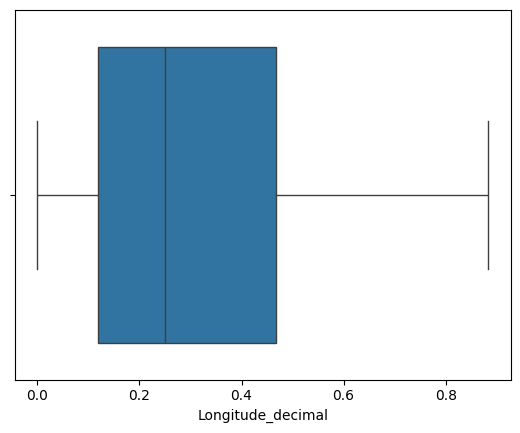

In [ ]:

sn.boxplot(x="Longitude_decimal", data=data);

<Axes: ylabel='Longitude_decimal'>

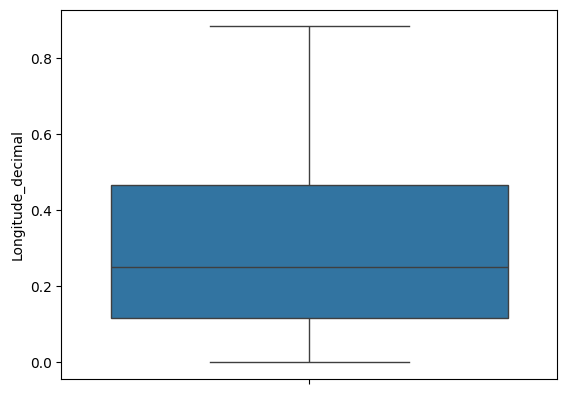

In [ ]:
sn.boxplot(data['Longitude_decimal'])

#Categorical feature

In [ ]:
data["Localite"].value_counts()


,count
Localite,
CINKASSE CENTRE,18
SAGBIEBOU,17
NAMONI,15
TAKPAMBA,13
NAMARE,11
...,...
DAKPANTE III,1
TOSSIOGUE,1
NAMBONGUE,1


<Axes: xlabel='Localite', ylabel='count'>

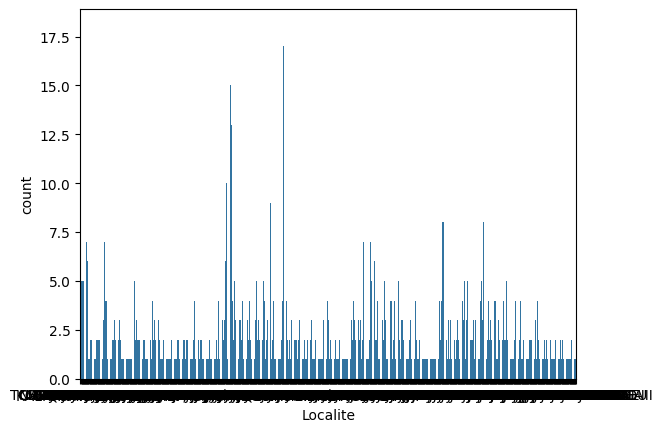

In [ ]:
#_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sn.countplot(x="Localite", data=data)
#sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

#Multivariate analysis

L’analyse multivariée regroupe les méthodes statistiques qui s’attachent à l’observation et au traitement simultané de plusieurs variables statistiques en vue d’en dégager une information synthétique pertinente.

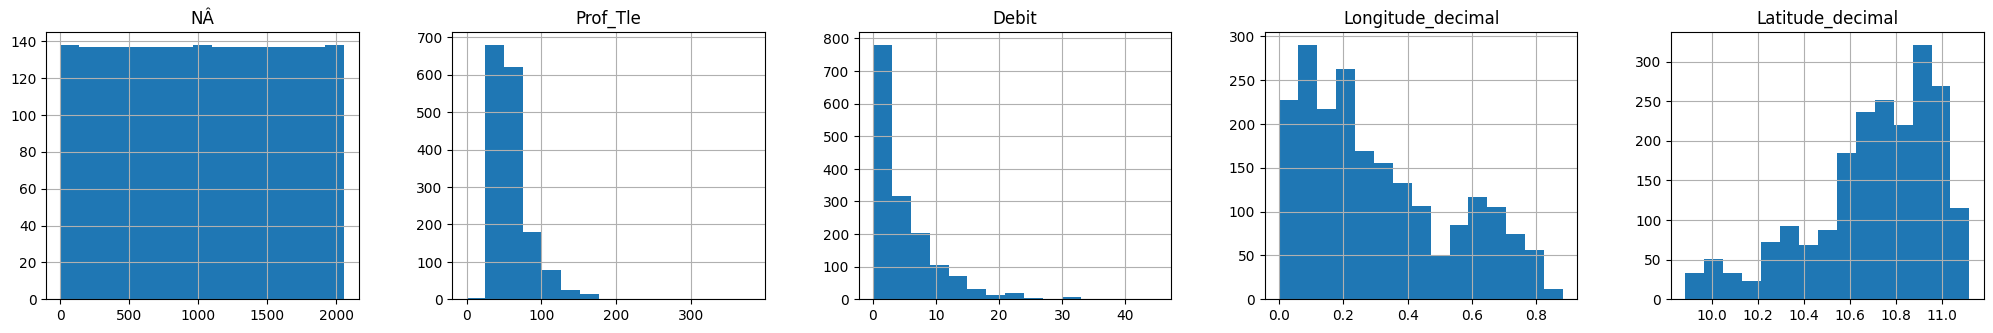

In [ ]:

# countinous features
#data[[""]]
data[numeric_columns].hist(bins=15,figsize=(25, 17), layout=(4, 5)
);

<Axes: >

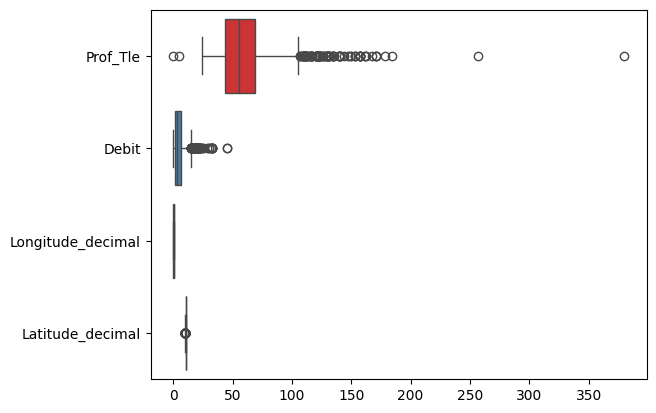

In [ ]:
sb.boxplot(data=df, orient="h", palette="Set1")

#Statistical Relationship

In [ ]:
(df.drop(columns=['Localite'])).corr()
#df.corr()

,Prof_Tle,Debit,Longitude_decimal,Latitude_decimal
Prof_Tle,1.000000,-0.190156,-0.001399,-0.108858
Debit,-0.190156,1.000000,0.020193,-0.039831
Longitude_decimal,-0.001399,0.020193,1.000000,-0.612739
Latitude_decimal,-0.108858,-0.039831,-0.612739,1.000000


In [ ]:
df_cor = (df.drop(columns=['Localite'])).corr()
df_cor

,Prof_Tle,Debit,Longitude_decimal,Latitude_decimal
Prof_Tle,1.000000,-0.190156,-0.001399,-0.108858
Debit,-0.190156,1.000000,0.020193,-0.039831
Longitude_decimal,-0.001399,0.020193,1.000000,-0.612739
Latitude_decimal,-0.108858,-0.039831,-0.612739,1.000000


Representaion de la matrice de correlation

In [ ]:
import seaborn  as sb
#coef corr mais dans un tableau avec seaborn

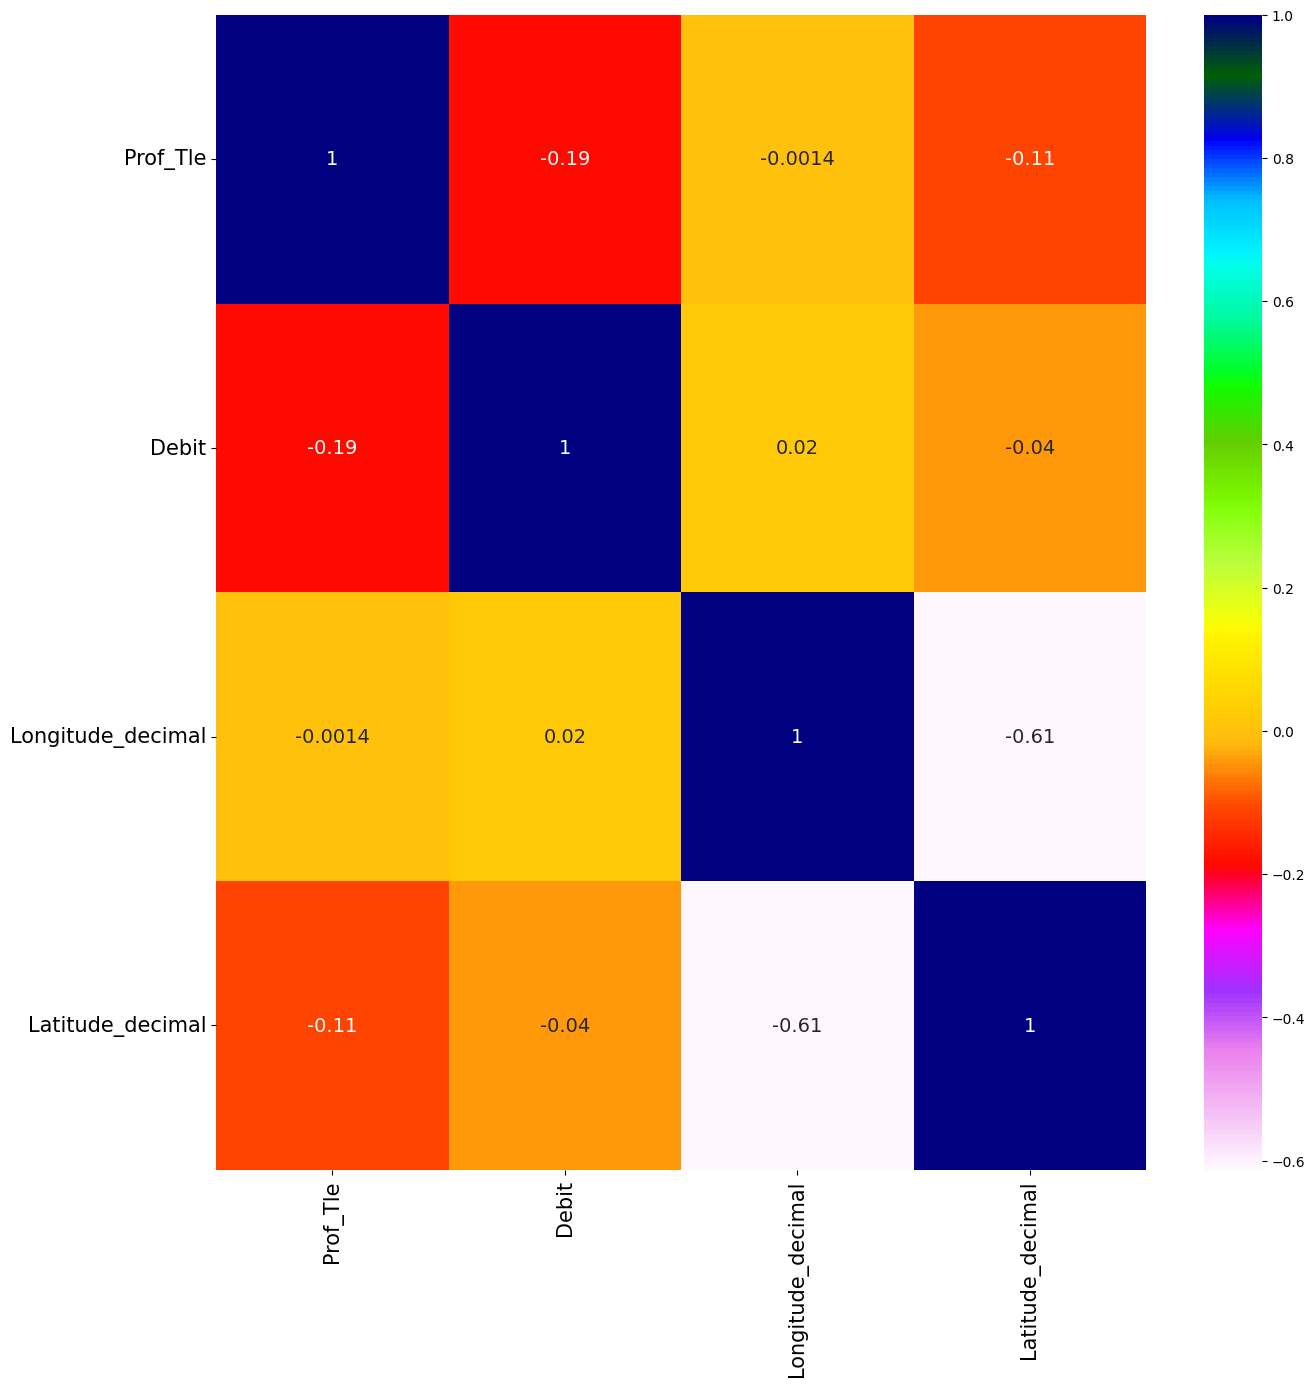

In [ ]:
# ne peux se faire qu'après une definitionn de la df corrélation
sb.heatmap(df_cor, xticklabels = df_cor.columns.values, yticklabels = df_cor.columns.values, annot = True, annot_kws={'size':14},cmap='gist_ncar_r')
heat_map = plt.gcf()
heat_map.set_size_inches(15,15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


#Verification des valeurs manquants

En statistiques, les données manquantes ou les valeurs manquantes se produisent lorsqu’aucune valeur de données n’est représentée pour une variable pour une observation donnée. Les données manquantes sont courantes et peuvent avoir un effet significatif sur l'inférence, les performances de prédiction ou toute autre utilisation faite avec les données.

In [14]:
data.isnull().sum()

,0
NÂ,0
Localite,0
Longitude,0
Latitude,0
Prof_Tle,450
Debit,507
Longitude_decimal,0
Latitude_decimal,0


#verifier les doubles valeurs

In [15]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2053,False
2054,False
2055,False
2056,False


#Verification  extremes(outliers)

Une valeur extrême (outlier) est une
observation “qui semble dévier
notoirement des autres éléments de
l’échantillon auquel elle appartient”
(Grubbs, 1969). Pour les detecter nous pouvons utiliser la description, le boxplot et skewness  par exemple.

In [ ]:
data.describe()

,NÂ,Prof_Tle,Debit,Longitude_decimal,Latitude_decimal
count,2058.000000,1608.000000,1551.00000,2058.000000,2058.000000
mean,1029.500000,60.932058,4.66381,0.309470,10.706197
std,594.237747,26.323878,5.21371,0.226768,0.281464
min,1.000000,0.000000,0.00000,0.000000,9.884444
25%,515.250000,44.000000,1.10000,0.117778,10.568056
50%,1029.500000,55.000000,2.88000,0.250833,10.751111
75%,1543.750000,69.187500,6.50000,0.466944,10.933333
max,2058.000000,380.000000,45.00000,0.883611,11.118056


#skewness

la valeur normale c'est comprise entre -1 et 1.

In [ ]:
print(data['Prof_Tle'].skew())
print(data['Debit'].skew())


2.715840386999879
2.4853260644963306


boxplot

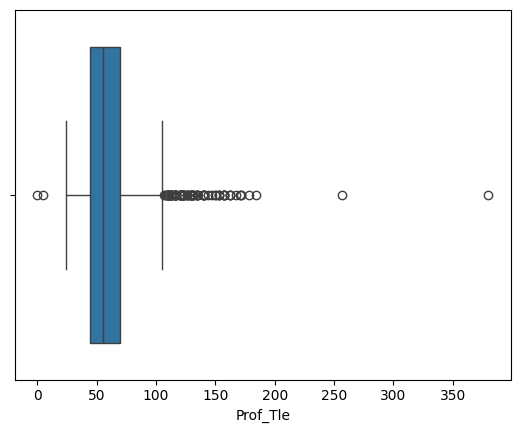

In [ ]:
sn.boxplot(x="Prof_Tle", data=data);

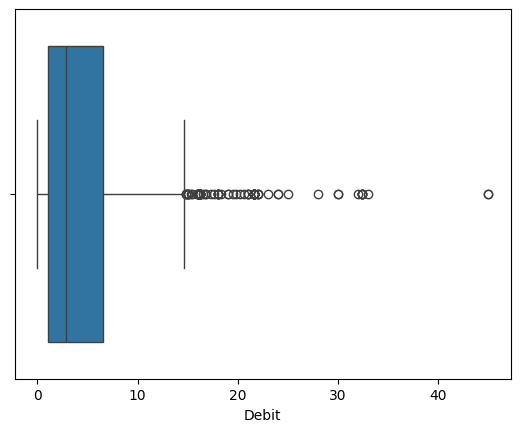

In [ ]:
sn.boxplot(x="Debit", data=data);

#Pandas profiling

une librarie tres interessante qui fait la plus part de l'analyse exploratoire d'un seul coup.

In [ ]:
!pip uninstall pandas-profiling

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip







     - 17.9 MB 35.9 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=390938 sha256=677e68b97ed70b4f4ca9393e7da6e60b7fcb4f6ff73f206dc43b946204933bab
  Stored in directory: /tmp/pip-ephem-wheel-cache-q4laibge/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for html

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
profile.to_file('report.html')





<ipython-input-31-bcd701ce59ce>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Data preprocessing(preparation de donnees)


Data preparation fait reference aux  etapes appliquees pour rendre les donnees plus adaptees a l’exploitation. Cela consiste a transformer  ces dernieres a un format comprehensible puisque donnees  sont la plus part des cas incompletes et incoherentes.
Nous pouvons citer les etapes suivantes:



#regler les valeurs manquantes

Pour les valeurs manquantes nous pouvons les traiter avec les methodes suivantes.

In [16]:
#méthode 1
df.dropna(inplace = True)
df.isnull().sum()

,0
Localite,0
Prof_Tle,0
Debit,0
Longitude_decimal,0
Latitude_decimal,0


In [12]:
df.head()

,Localite,Prof_Tle,Debit,Longitude_decimal,Latitude_decimal
0,GARO,34.0,10.28,0.051389,11.034722
1,SAFOBE,41.0,6.80,0.117778,11.034444
2,NASSABLE,44.5,1.20,0.117222,11.017778
3,TONGA,37.1,10.28,0.034722,11.000833
4,TIMBOU,44.0,8.00,0.101111,11.017778


In [7]:
#recupere les dernières lignes de la df
df.tail()

# Sauvegarder le DataFrame dans un fichier CSV
df.to_csv('/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/df.csv', index=False)


In [18]:
df.isnull().sum()

,0
Localite,0
Prof_Tle,0
Debit,0
Longitude_decimal,0
Latitude_decimal,0


I-AUTOURT DE CHAQUE POINT FAIRE UN CONTOURT QUELCONQUE  DE 1000 m2

In [8]:
pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np
import pyproj

# Créer un GeoDataFrame à partir des coordonnées de longitude et latitude
geometry = [Point(xy) for xy in zip(df['Longitude_decimal'], df['Latitude_decimal'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

def create_random_shape(point, target_area=1000):
    num_points = np.random.randint(3, 7)  # Choix aléatoire du nombre de points pour créer la forme
    angle_step = 2 * np.pi / num_points
    # Calcul du rayon initial en fonction de la surface cible
    initial_radius = np.sqrt(target_area / (num_points * np.sin(angle_step / 2)))

    # Convertir les coordonnées du point en UTM pour une échelle plus homogène
    utm_crs = pyproj.CRS("EPSG:32632")  # Exemple avec la zone UTM 32N (vous pouvez ajuster selon votre région)
    project = pyproj.Transformer.from_crs("EPSG:4326", utm_crs, always_xy=True).transform
    x_utm, y_utm = project(point.x, point.y)

    # Utilisation du centroïde UTM comme point central
    vertices = []
    for i in range(num_points):
        angle = i * angle_step
        new_x = x_utm + initial_radius * np.cos(angle)
        new_y = y_utm + initial_radius * np.sin(angle)
        # Convertir les coordonnées en latitude et longitude
        lon, lat = pyproj.Transformer.from_crs(utm_crs, "EPSG:4326", always_xy=True).transform(new_x, new_y)
        vertices.append((lon, lat))

    # Ajouter le premier point à la fin pour fermer le polygone
    vertices.append(vertices[0])
    polygon = Polygon(vertices)

    return polygon

# Créer une colonne pour les contours de forme quelconque
gdf['contour'] = gdf['geometry'].apply(lambda x: create_random_shape(x.centroid, target_area=1000))

# Afficher le GeoDataFrame avec les contours
print(gdf)


          Localite  Prof_Tle   Debit  Longitude_decimal  Latitude_decimal  \
0             GARO     34.00  10.280           0.051389         11.034722   
1           SAFOBE     41.00   6.800           0.117778         11.034444   
2         NASSABLE     44.50   1.200           0.117222         11.017778   
3            TONGA     37.10  10.280           0.034722         11.000833   
4           TIMBOU     44.00   8.000           0.101111         11.017778   
...            ...       ...     ...                ...               ...   
2053   NAMONDOUGBA       NaN   3.927           0.133611         10.950278   
2054    BOULKOUGUE     79.88   0.923           0.218056         10.817222   
2055    TANKOMONLE     65.35   1.200           0.300556         10.901111   
2056       KAMBELI     42.96   2.400           0.150833         10.950000   
2057  DJAPKERENAAG     43.34   4.900           0.150278         10.850833   

                      geometry  \
0     POINT (0.05139 11.03472)   
1     P

II-DEFINIR LE PARCOURS ET CHERCHER LES LINAEMENTS

In [9]:
import geopandas as gpd
from shapely.geometry import Polygon
import math
from itertools import combinations

def calculate_longest_distance(polygon):
    R = 0.0
    point_combinations = combinations(list(polygon.exterior.coords), 2)
    for point_pair in point_combinations:
        distance = math.sqrt((point_pair[0][0] - point_pair[1][0])**2 + (point_pair[0][1] - point_pair[1][1])**2)
        if distance > R:
            R = distance
    return R

def generer_points_sur_cercle(R, nombre_points, centroide):
    cercle = centroide.buffer(R)
    perimetre_cercle = cercle.boundary
    points = [perimetre_cercle.interpolate(i / nombre_points, normalized=True) for i in range(nombre_points)]
    coordinates_list = [(point.x, point.y) for point in points]
    return coordinates_list

def generate_equidistant_points(row):
    polygon = row['contour']
    centroide = polygon.centroid
    longest_distance = calculate_longest_distance(polygon)
    nombre_points = int(2 * longest_distance * 3.14 * 111000)
    if nombre_points > 0:
        points = generer_points_sur_cercle(longest_distance, nombre_points, centroide)
        return Polygon(points)
    return None

# Créer un exemple de GeoDataFrame pour la démonstration


gdf = gdf

# Créer une nouvelle colonne avec les polygones équidistants
gdf['equidistant_polygons'] = gdf.apply(lambda row: generate_equidistant_points(row), axis=1)

# Supprimer les lignes sans polygones équidistants
gdf = gdf.dropna(subset=['equidistant_polygons'])

# Afficher le GeoDataFrame résultant
print(gdf)


          Localite  Prof_Tle   Debit  Longitude_decimal  Latitude_decimal  \
0             GARO     34.00  10.280           0.051389         11.034722   
1           SAFOBE     41.00   6.800           0.117778         11.034444   
2         NASSABLE     44.50   1.200           0.117222         11.017778   
3            TONGA     37.10  10.280           0.034722         11.000833   
4           TIMBOU     44.00   8.000           0.101111         11.017778   
...            ...       ...     ...                ...               ...   
2053   NAMONDOUGBA       NaN   3.927           0.133611         10.950278   
2054    BOULKOUGUE     79.88   0.923           0.218056         10.817222   
2055    TANKOMONLE     65.35   1.200           0.300556         10.901111   
2056       KAMBELI     42.96   2.400           0.150833         10.950000   
2057  DJAPKERENAAG     43.34   4.900           0.150278         10.850833   

                      geometry  \
0     POINT (0.05139 11.03472)   
1     P

III-GENERER LES TRAJETS QUI VONT SERVIR AU GPX AVEC ELEVATION

In [1]:
import numpy as np
from shapely.geometry import Point

def equidistant_points(row):
    equidistant_points = []
    polygon = row['equidistant_polygons']
    coords = polygon.exterior.coords
    num_points_between = len(coords) // 2
    for i in range(len(coords)):
        point1 = Point(coords[i])
        # Trouver l'indice du point opposé
        opposite_index = (i + len(coords) // 2) % len(coords)
        point2 = Point(coords[opposite_index])

        # Calculer la distance entre point1 et point2
        distance = point1.distance(point2) * 111000
        vector = np.array([point2.x - point1.x, point2.y - point1.y]) / num_points_between
        for j in range(1, num_points_between + 1):
            new_point = Point(point1.x + j * vector[0], point1.y + j * vector[1])
            equidistant_points.append(new_point)
    return equidistant_points

# Ajouter la colonne equidistant point
gdf['equidistant_points'] = gdf.apply(lambda row: equidistant_points(row), axis=1)


NameError: name 'gdf' is not defined

In [ ]:
#Supprimer les lignes vides et réinitialiser les index

# Supprimer les lignes vides du DataFrame
gdf = gdf.dropna()

# Réinitialiser l'index du DataFrame après la suppression des lignes vides
gdf = gdf.reset_index(drop=True)

gdf


In [2]:
gdf['equidistant_points']

NameError: name 'gdf' is not defined

In [1]:
gdf['equidistant_points'] = gdf['equidistant_points'].astype(str).str.split(',').str[0].astype(float)

# Vérifiez le résultat
print(gdf['equidistant_points'].head())


NameError: name 'gdf' is not defined

In [ ]:
print(gdf['equidistant_points'].apply(type).value_counts())

In [ ]:
#Selectionner le ligne 0
premiere_ligne = gdf.loc[0, 'equidistant_points']
premiere_ligne

[<POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.052 11.035)>,
 <POINT (0.051 11.035)>,
 <POINT (0.051 11.035)>,
 <POINT (0.051 11.035)>,
 <POINT (0.051 11.035)>,
 <POINT (0.051 11.035)>,
 <POINT (0.051 11.035)>,


In [ ]:

# Obtenir le format de fichier
format_fichier = gdf.crs.name

print(format_fichier)


WGS 84


In [ ]:

# Sauvegarder le DataFrame dans un fichier CSV
gdf.to_csv('/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/gdf.csv', index=False)


In [ ]:
import pandas as pd
import geopandas as gpd
import os
import re

# Chemin vers votre fichier CSV
chemin_csv = '/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/gdf.csv'

# Charger le fichi er CSV dans un DataFrame
df = pd.read_csv(chemin_csv)

# Expression régulière pour extraire les coordonnées
pattern = r'<POINT \(([-+]?\d*\.\d+) ([-+]?\d*\.\d+)\)>'

# Fonction pour extraire les coordonnées x et y
def extract_coordinates(text):
    match = re.findall(pattern, text)
    if match:
        return [(float(x), float(y)) for x, y in match]
    else:
        return []

# Dossier pour enregistrer les fichiers GeoJSON
dossier_geojson = '/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/les_fichiers_GeoJSON'
os.makedirs(dossier_geojson, exist_ok=True)

# Liste pour stocker les géométries
geometries = []

# Boucle sur chaque ligne du DataFrame
for index, row in df.iterrows():
    # Extraire les coordonnées x et y de la colonne 'equidistant_points'
    coordinates = extract_coordinates(row['equidistant_points'])

    if coordinates:
        # Créer une géométrie Point pour chaque paire de coordonnées
        points = [gpd.points_from_xy([x], [y])[0] for x, y in coordinates]

        # Créer un GeoDataFrame temporaire
        gdf_temp = gpd.GeoDataFrame(geometry=points)

        # Générer le nom de fichier avec l'index de la ligne
        nom_fichier = f"fichier_{index}.geojson"
        chemin_fichier = os.path.join(dossier_geojson, nom_fichier)

        # Enregistrer le GeoDataFrame temporaire au format GeoJSON
        gdf_temp.to_file(chemin_fichier, driver='GeoJSON')

        # Ajouter le lien du fichier GeoJSON créé dans une nouvelle colonne du DataFrame initial
        df.loc[index, 'lien_drive'] = chemin_fichier

        # Ajouter les géométries à la liste
        geometries.extend(points)
    else:
        # Si les coordonnées ne peuvent pas être extraites, ignorer cette ligne ou gérer l'erreur
        print(f"Erreur lors de l'extraction des coordonnées pour l'index {index}")

# Créer un GeoDataFram  à partir de la liste de géométries
gdf_final = gpd.GeoDataFrame(geometry=geometries)

# Enregistrer le GeoDataFrame final au format GeoJSON
gdf_final.to_file('/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/gdf_final.geojson', driver='GeoJSON')

# Enregistrer le DataFrame modifié avec les liens dans un nouveau fichier CSV
df.to_csv('/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/gdf_avec_liens.csv', index=False)


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not 

Erreur lors de l'extraction des coordonnées pour l'index 27


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not 

Erreur lors de l'extraction des coordonnées pour l'index 58


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not 

Erreur lors de l'extraction des coordonnées pour l'index 423


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not 

Erreur lors de l'extraction des coordonnées pour l'index 1118


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not 

Erreur lors de l'extraction des coordonnées pour l'index 1162


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not 

Erreur lors de l'extraction des coordonnées pour l'index 1298


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not 

Erreur lors de l'extraction des coordonnées pour l'index 1465


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not 

In [ ]:
df.to_csv('/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/gdf_avec_liens.csv', index=False)


In [ ]:
import pandas as pd
pd.read_csv("/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/gdf_avec_liens.csv")



,Localite,Prof_Tle,Debit,Longitude_decimal,Latitude_decimal,geometry,contour,equidistant_polygons,equidistant_points,lien_drive
0,GARO,34.00,10.280,0.051389,11.034722,POINT (0.0513888888888889 11.034722222222221),POLYGON ((0.0515589203729852 11.03472728552509...,POLYGON ((0.0517291025351058 11.03472222220610...,"[<POINT (0.052 11.035)>, <POINT (0.052 11.035)...",/content/drive/MyDrive/PC/Documents PC/DTI/Mem...
1,SAFOBE,41.00,6.800,0.117778,11.034444,POINT (0.1177777777777778 11.034444444444444),POLYGON ((0.1179446125345155 11.03444937496696...,POLYGON ((0.1180949575125072 11.03444444444008...,"[<POINT (0.118 11.034)>, <POINT (0.118 11.034)...",/content/drive/MyDrive/PC/Documents PC/DTI/Mem...
2,NASSABLE,44.50,1.200,0.117222,11.017778,POINT (0.1172222222222222 11.017777777777779),POLYGON ((0.1173890473266034 11.01778270125621...,POLYGON ((0.1175393845142111 11.01777777777342...,"[<POINT (0.118 11.018)>, <POINT (0.118 11.018)...",/content/drive/MyDrive/PC/Documents PC/DTI/Mem...
3,TONGA,37.10,10.280,0.034722,11.000833,POINT (0.0347222222222222 11.000833333333333),POLYGON ((0.0348872934821221 11.00083824387295...,POLYGON ((0.035052510737098 11.000833333333482...,"[<POINT (0.035 11.001)>, <POINT (0.035 11.001)...",/content/drive/MyDrive/PC/Documents PC/DTI/Mem...
4,TIMBOU,44.00,8.000,0.101111,11.017778,POINT (0.1011111111111111 11.017777777777779),POLYGON ((0.1012885343846376 11.01778302368955...,POLYGON ((0.1014177262787504 11.01777777775131...,"[<POINT (0.101 11.018)>, <POINT (0.101 11.018)...",/content/drive/MyDrive/PC/Documents PC/DTI/Mem...
...,...,...,...,...,...,...,...,...,...,...
1520,DORE,55.20,7.200,0.167500,10.867222,POINT (0.1675 10.867222222222223),POLYGON ((0.1676667638427759 10.86722705200790...,POLYGON ((0.167817051886751 10.867222222217919...,"[<POINT (0.168 10.867)>, <POINT (0.168 10.867)...",/content/drive/MyDrive/PC/Documents PC/DTI/Mem...
1521,BOULKOUGUE,79.88,0.923,0.218056,10.817222,POINT (0.2180555555555556 10.817222222222222),POLYGON ((0.2182206084799894 10.81722695384932...,POLYGON ((0.2183857969694606 10.81722222222233...,"[<POINT (0.218 10.817)>, <POINT (0.218 10.817)...",/content/drive/MyDrive/PC/Documents PC/DTI/Mem...
1522,TANKOMONLE,65.35,1.200,0.300556,10.901111,POINT (0.3005555555555555 10.901111111111112),POLYGON ((0.3007223983652713 10.90111588333836...,POLYGON ((0.3008727507179195 10.90111111110677...,"[<POINT (0.301 10.901)>, <POINT (0.301 10.901)...",/content/drive/MyDrive/PC/Documents PC/DTI/Mem...
1523,KAMBELI,42.96,2.400,0.150833,10.950000,POINT (0.1508333333333333 10.95),POLYGON ((0.1510001357352846 10.95000487521181...,POLYGON ((0.1511504547591064 10.94999999999566...,"[<POINT (0.151 10.95)>, <POINT (0.151 10.95)>,...",/content/drive/MyDrive/PC/Documents PC/DTI/Mem...


#Transformer les equidistants points en csv facilement exploitable sur qgis

In [ ]:
import pandas as pd
import os

# Lire le fichier
df = pd.read_csv("/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/gdf_avec_liens.csv")

# Afficher quelques exemples de points pour diagnostic
print("Exemples de points (premières lignes) :")
print(df['equidistant_points'].head())

# Créer un dossier pour enregistrer les fichiers CSV
output_dir = '/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/fichier_csv'
os.makedirs(output_dir, exist_ok=True)

# Liste pour stocker les liens vers les nouveaux fichiers CSV
csv_links = []

for index, row in df.iterrows():
    # Enlever les crochets et séparer par des virgules
    points = row['equidistant_points'].strip('[]').split(',')

    # Créer des listes pour les longitudes et latitudes
    longitudes = []
    latitudes = []

    for point in points:
        try:
            # Nettoyer le point et extraire les coordonnées
            point_cleaned = point.strip().replace('<POINT (', '').replace(')>', '')
            if point_cleaned:  # Vérifier que la chaîne n'est pas vide
                lon, lat = point_cleaned.split(' ')
                longitudes.append(float(lon.strip()))  # Convertir en float
                latitudes.append(float(lat.strip()))
        except ValueError:
            print(f"Erreur de format pour le point : '{point}'. Ignoré.")
            continue  # Passer à l'itération suivante
        except Exception as e:
            print(f"Erreur inattendue pour le point : '{point}'. Détails : {e}")
            continue  # Gérer les autres erreurs

    # Créer un nouveau DataFrame pour les points
    if longitudes and latitudes:  # Assurer qu'il y a des données valides
        points_df = pd.DataFrame({
            'index': range(len(longitudes)),  # Index de 0 à n-1
            'longitude': longitudes,
            'latitude': latitudes
        })

        # Générer le nom de fichier
        output_file = os.path.join(output_dir, f'points_{index}.csv')
        points_df.to_csv(output_file, index=False)

        # Ajouter le lien du nouveau fichier au tableau
        csv_links.append(output_file)
    else:
        print(f"Aucun point valide trouvé pour l'index {index}.")

# Ajouter la nouvelle colonne avec les liens vers les fichiers CSV
df['csv_points_equidistant'] = csv_links
df.to_csv('/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/gdf_avec_liens_modifie.csv', index=False)


Exemples de points (premières lignes) :
0    [<POINT (0.052 11.035)>, <POINT (0.052 11.035)...
1    [<POINT (0.118 11.034)>, <POINT (0.118 11.034)...
2    [<POINT (0.118 11.018)>, <POINT (0.118 11.018)...
3    [<POINT (0.035 11.001)>, <POINT (0.035 11.001)...
4    [<POINT (0.101 11.018)>, <POINT (0.101 11.018)...
Name: equidistant_points, dtype: object


In [ ]:
import os
import pandas as pd
import re  # Pour extraire les coordonnées des points

# Charger le DataFrame
df = pd.read_csv("/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/gdf_avec_liens.csv")

# Fonction pour extraire les coordonnées des objets POINT
def parse_point_string(point_str):
    match = re.match(r'<POINT \(([-\d.]+) ([-\d.]+)\)>', point_str)
    if match:
        lat, lon = match.groups()
        return float(lat), float(lon)
    return None

# Fonction pour extraire tous les points d'une ligne
def extract_points(point_list_str):
    point_strings = point_list_str.strip('[]').split(', ')
    points = [parse_point_string(p) for p in point_strings]
    return [p for p in points if p is not None]

# Fonction pour sélectionner les points par pas
def select_points_with_step(points, start=0, step=30):
    return points[start::step]  # Sélectionne les points avec un pas de "step"

# Créer un dossier principal 'sequence' s'il n'existe pas
sequence_dir = '/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/sequence'
os.makedirs(sequence_dir, exist_ok=True)

# Initialisation des indices de départ pour chaque ligne
start_indices = {idx: 0 for idx in range(len(df))}

# Parcourir chaque ligne du DataFrame
for idx, row in df.iterrows():
    # Nom du dossier pour la ligne actuelle, par exemple "L1", "L2", ...
    folder_name = f'L{idx + 1}'
    folder_path = os.path.join(sequence_dir, folder_name)
    os.makedirs(folder_path, exist_ok=True)

    # Extraire et parser les points
    raw_points = row['equidistant_points'].astype(float)  # Récupérer les points sous forme brute
    points = extract_points(raw_points)  # Extraire les coordonnées (lat, lon)

    # Obtenir l'index de départ pour cette ligne
    start_index = start_indices[idx]

    # Traiter les points en blocs de 30
    while start_index < len(points):
        # Sélectionner les points du bloc actuel
        selected_points = points[start_index:start_index + 30]

        # Si aucun point n'est sélectionné, arrêter
        if not selected_points:
            break

        # Nommer le fichier pour le bloc actuel
        part_number = (start_index // 30) + 1  # Numérotation des blocs
        file_name = f'{folder_name}P{part_number}.txt'  # Exemple : L1P1.txt
        file_path = os.path.join(folder_path, file_name)

        # Sauvegarder les points sélectionnés dans un fichier
        with open(file_path, 'w') as f:
            for point in selected_points:
                if isinstance(point, (list, tuple)) and len(point) == 2:
                    f.write(f'{point[0]}, {point[1]}\n')
                else:
                    print(f"Point ignoré : {point}")

        print(f'Fichier créé: {file_path}')

        # Mettre à jour l'index de départ
        start_index += 30

    # Mettre à jour l'index de départ pour la prochaine itération
    start_indices[idx] = start_index

print("Tous les fichiers ont été créés avec succès.")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Fichier créé: /content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/sequence/L913/L913P746.txt
Fichier créé: /content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/sequence/L913/L913P747.txt
Fichier créé: /content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/sequence/L913/L913P748.txt
Fichier créé: /content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/sequence/L913/L913P749.txt
Fichier créé: /content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/sequence/L913/L913P750.txt
Fichier créé: /content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/sequence/L913/L913P751.txt
Fichier créé: /content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/sequence/L913/L913P752.txt
Fichier créé: /content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/sequence/L913/L913P753.txt
Fichier créé: /con

KeyboardInterrupt: 

In [ ]:
pip install gpxpy
import pandas as pd
import gpxpy
import os

def get_gpx_data(gpx_file):
    with open(gpx_file, 'r') as f:
        gpx = gpxpy.parse(f)
        points = []
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    points.append({
                        'latitude': point.latitude,
                        'longitude': point.longitude,
                        'elevation': point.elevation
                    })
        return points

def load_gpx_data(folder_path):
    gpx_data = {}
    for i in range(1501):  # assuming there are 1500 files named 0.gpx to 1500.gpx
        file_path = os.path.join(folder_path, f"{i}.gpx")
        if os.path.exists(file_path):
            gpx_data[i] = get_gpx_data(file_path)
        else:
            gpx_data[i] = None
    return gpx_data


In [ ]:
def add_gpx_data_to_df(df, gpx_data):
    df['gpx_data'] = df.index.map(gpx_data.get)
    return df

# Exemple d'utilisation
folder_path = '/content/drive/MyDrive/PC/Documents PC/DTI/Memoire/Projet FIN Formation/ELEVATION'  # remplace par le chemin de ton dossier
gpx_data = load_gpx_data(folder_path)

# Supposons que ton DataFrame s'appelle df
# Remplace ceci par ton DataFrame réel et assure-toi que les indices correspondent bien aux fichiers GPX

df = add_gpx_data_to_df(df, gpx_data)

df


Les Algorithme ML à utilisé
Regression multivariée
Regression Ridge
Regression Lasso
Reseau de neuronne simples
Reseau de neuronnes CNN
SVM avec regression SVR:
Random Forest
Grandiant Boosting


# Regression multivariée

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Charger les données des caractéristiques et des cibles
features = pd.read_csv('features.csv')  # Remplacez par le chemin de votre fichier
targets = pd.read_csv('targets.csv')    # Remplacez par le chemin de votre fichier

# Afficher les premières lignes des données pour vérification
print(features.head())
print(targets.head())


# Initialiser le normaliseur
scaler = StandardScaler()

# Ajuster le normaliseur sur les données des caractéristiques et normaliser ces données
features_normalized = scaler.fit_transform(features)

# Convertir le résultat en DataFrame pour plus de clarté
features_normalized = pd.DataFrame(features_normalized, columns=features.columns)


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_normalized, targets, test_size=0.2, random_state=42)



In [ ]:
# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

In [ ]:
# Prédire de nouvelles valeurs(ici il va falloir rechercher les valeurs linaements, points forage et dolines avant d'arranger et lancer)
new_data = pd.DataFrame({
    'contours': [val1, val2, val3, val4],
    'lineaments': [val5, val6, val7, val8],
    'points_forage': [val9, val10, val11, val12],
    'dolines': [val13, val14, val15, val16]
})  # Remplacer les valeurs par vos nouvelles données

# Normaliser les nouvelles données de la même manière
new_data_normalized = scaler.transform(new_data)

y_new_pred = model.predict(new_data_normalized)
print("Prédictions pour les nouvelles données :", y_new_pred)


# Regression Ridge et Lasso

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Charger les données des caractéristiques et des cibles
features = pd.read_csv('features.csv')  # Remplacez par le chemin de votre fichier
targets = pd.read_csv('targets.csv')    # Remplacez par le chemin de votre fichier

# Afficher les premières lignes des données pour vérification
print(features.head())
print(targets.head())


# Initialiser le normaliseur
scaler = StandardScaler()

# Ajuster le normaliseur sur les données des caractéristiques et normaliser ces données
features_normalized = scaler.fit_transform(features)

# Convertir le résultat en DataFrame pour plus de clarté
features_normalized = pd.DataFrame(features_normalized, columns=features.columns)


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_normalized, targets, test_size=0.2, random_state=42)


In [ ]:
# Définir les valeurs de alpha à tester
alphas = np.logspace(-3, 3, 100)  # 100 valeurs de alpha entre 0.001 et 1000

ridge_errors = []
lasso_errors = []

# Tester chaque valeur de alpha pour Ridge
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_y_pred = ridge_model.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_y_pred)
    ridge_errors.append(ridge_mse)

# Tester chaque valeur de alpha pour Lasso
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)  # Augmenter max_iter si nécessaire
    lasso_model.fit(X_train, y_train)
    lasso_y_pred = lasso_model.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_y_pred)
    lasso_errors.append(lasso_mse)

# Afficher les résultats
print("Ridge Errors:", ridge_errors)
print("Lasso Errors:", lasso_errors)


In [ ]:
plt.figure(figsize=(14, 6))

# Erreurs de Ridge
plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_errors, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression')
plt.grid(True)

# Erreurs de Lasso
plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_errors, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso Regression')
plt.grid(True)

plt.show()


# Reseau de neuronne simples

> Ajouter une citation



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Charger les données des caractéristiques et des cibles
features = pd.read_csv('features.csv')  # Remplacez par le chemin de votre fichier
targets = pd.read_csv('targets.csv')    # Remplacez par le chemin de votre fichier

# Afficher les premières lignes des données pour vérification
print(features.head())
print(targets.head())


# Initialiser le normaliseur
scaler = StandardScaler()

# Ajuster le normaliseur sur les données des caractéristiques et normaliser ces données
features_normalized = scaler.fit_transform(features)

# Convertir le résultat en DataFrame pour plus de clarté
features_normalized = pd.DataFrame(features_normalized, columns=features.columns)


In [ ]:

def create_model(layers, units, learning_rate):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(X_train.shape[1],)))

    for _ in range(layers - 1):
        model.add(Dense(units, activation='relu'))

    model.add(Dense(y_train.shape[1]))  # Couche de sortie

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    return model


In [ ]:
layers_options = [1, 2, 3]  # Nombre de couches cachées
units_options = [16, 32, 64]  # Nombre de neurones par couche
learning_rate_options = [0.001, 0.01, 0.1]  # Taux d'apprentissage

results = []

for layers in layers_options:
    for units in units_options:
        for learning_rate in learning_rate_options:
            print(f'Training model with {layers} layers, {units} units, learning rate {learning_rate}')

            model = create_model(layers, units, learning_rate)
            model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            results.append((layers, units, learning_rate, mse))



In [ ]:
# Trier les résultats par MSE
results.sort(key=lambda x: x[3])

# Afficher les meilleurs résultats
for layers, units, learning_rate, mse in results[:10]:  # Afficher les 10 meilleurs résultats
    print(f'Layers: {layers}, Units: {units}, Learning Rate: {learning_rate}, MSE: {mse}')



# Reseau de neuronnes CNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam


# Charger les données des caractéristiques et des cibles
features = pd.read_csv('features.csv')  # Remplacez par le chemin de votre fichier
targets = pd.read_csv('targets.csv')    # Remplacez par le chemin de votre fichier

# Afficher les premières lignes des données pour vérification
print(features.head())
print(targets.head())


# Initialiser le normaliseur
scaler = StandardScaler()

# Ajuster le normaliseur sur les données des caractéristiques et normaliser ces données
features_normalized = scaler.fit_transform(features)

# Convertir le résultat en DataFrame pour plus de clarté
features_normalized = pd.DataFrame(features_normalized, columns=features.columns)


# Reshape des données pour être compatibles avec Conv1D
X_train, X_test, y_train, y_test = train_test_split(features_normalized, targets, test_size=0.2, random_state=42)

# Ajouter une dimension supplémentaire pour Conv1D
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]


In [ ]:
def create_cnn_model(filters, kernel_size, learning_rate):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(y_train.shape[1]))  # Couche de sortie

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    return model


In [ ]:
filters_options = [8, 16, 32]  # Nombre de filtres pour Conv1D
kernel_size_options = [2, 3, 4]  # Taille des noyaux de convolution
learning_rate_options = [0.001, 0.01, 0.1]  # Taux d'apprentissage

results = []

for filters in filters_options:
    for kernel_size in kernel_size_options:
        for learning_rate in learning_rate_options:
            print(f'Training model with {filters} filters, kernel size {kernel_size}, learning rate {learning_rate}')

            model = create_cnn_model(filters, kernel_size, learning_rate)
            model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            results.append((filters, kernel_size, learning_rate, mse))


In [ ]:
# Trier les résultats par MSE
results.sort(key=lambda x: x[3])

# Afficher les meilleurs résultats
for filters, kernel_size, learning_rate, mse in results[:10]:  # Afficher les 10 meilleurs résultats
    print(f'Filters: {filters}, Kernel Size: {kernel_size}, Learning Rate: {learning_rate}, MSE: {mse}')


# SVM avec regression SVR(support vector regression)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Charger les données des caractéristiques et des cibles
features = pd.read_csv('features.csv')  # Remplacez par le chemin de votre fichier
targets = pd.read_csv('targets.csv')    # Remplacez par le chemin de votre fichier

# Afficher les premières lignes des données pour vérification
print(features.head())
print(targets.head())

# Initialiser le normaliseur
scaler = StandardScaler()

# Ajuster le normaliseur sur les données des caractéristiques et normaliser ces données
features_normalized = scaler.fit_transform(features)

# Convertir le résultat en DataFrame pour plus de clarté
features_normalized = pd.DataFrame(features_normalized, columns=features.columns)


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_normalized, targets, test_size=0.2, random_state=42)


In [ ]:
def create_svr_model(C):
    model = SVR(C=C)
    return model

C_values = np.logspace(-3, 3, 100)  # 100 valeurs de C entre 0.001 et 1000

results = []

for C in C_values:
    print(f'Training model with C = {C}')

    model = create_svr_model(C)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append((C, mse))


In [ ]:
# Trier les résultats par MSE
results.sort(key=lambda x: x[1])

# Afficher les meilleurs résultats
for C, mse in results[:10]:  # Afficher les 10 meilleurs résultats
    print(f'C: {C}, MSE: {mse}')


In [ ]:
Cs, mses = zip(*results)

plt.figure(figsize=(10, 6))
plt.plot(Cs, mses, marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('MSE')
plt.title('SVR Regression')
plt.grid(True)
plt.show()


#  Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Charger les données des caractéristiques et des cibles
features = pd.read_csv('features.csv')  # Remplacez par le chemin de votre fichier
targets = pd.read_csv('targets.csv')    # Remplacez par le chemin de votre fichier

# Afficher les premières lignes des données pour vérification
print(features.head())
print(targets.head())

# Initialiser le normaliseur
scaler = StandardScaler()

# Ajuster le normaliseur sur les données des caractéristiques et normaliser ces données
features_normalized = scaler.fit_transform(features)

# Convertir le résultat en DataFrame pour plus de clarté
features_normalized = pd.DataFrame(features_normalized, columns=features.columns)


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_normalized, targets, test_size=0.2, random_state=42)


In [ ]:
def create_rf_model(n_estimators, max_depth):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    return model

n_estimators_options = [50, 100, 200]  # Différentes valeurs pour le nombre d'arbres
max_depth_options = [None, 10, 20]  # Différentes valeurs pour la profondeur maximale

results = []

for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        print(f'Training model with n_estimators = {n_estimators}, max_depth = {max_depth}')

        model = create_rf_model(n_estimators, max_depth)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results.append((n_estimators, max_depth, mse))



In [ ]:
# Trier les résultats par MSE
results.sort(key=lambda x: x[2])

# Afficher les meilleurs résultats
for n_estimators, max_depth, mse in results[:10]:  # Afficher les 10 meilleurs résultats
    print(f'n_estimators: {n_estimators}, max_depth: {max_depth}, MSE: {mse}')



In [ ]:
# Extraire les valeurs uniques pour n_estimators et max_depth
n_estimators_values = list(set([x[0] for x in results]))
max_depth_values = list(set([x[1] for x in results]))

# Créer une matrice pour stocker les erreurs
error_matrix = np.zeros((len(n_estimators_values), len(max_depth_values)))

for result in results:
    i = n_estimators_values.index(result[0])
    j = max_depth_values.index(result[1])
    error_matrix[i, j] = result[2]

plt.figure(figsize=(10, 6))
plt.imshow(error_matrix, interpolation='nearest', cmap='viridis')
plt.colorbar(label='MSE')
plt.xticks(np.arange(len(max_depth_values)), max_depth_values)
plt.yticks(np.arange(len(n_estimators_values)), n_estimators_values)
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.title('Random Forest Regression Error')
plt.show()


#  Grandiant Boosting

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Charger les données des caractéristiques et des cibles
features = pd.read_csv('features.csv')  # Remplacez par le chemin de votre fichier
targets = pd.read_csv('targets.csv')    # Remplacez par le chemin de votre fichier

# Afficher les premières lignes des données pour vérification
print(features.head())
print(targets.head())


# Initialiser le normaliseur
scaler = StandardScaler()

# Ajuster le normaliseur sur les données des caractéristiques et normaliser ces données
features_normalized = scaler.fit_transform(features)

# Convertir le résultat en DataFrame pour plus de clarté
features_normalized = pd.DataFrame(features_normalized, columns=features.columns)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_normalized, targets, test_size=0.2, random_state=42)


In [ ]:
def create_gb_model(n_estimators, max_depth, learning_rate):
    model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    return model

n_estimators_options = [50, 100, 200]  # Différentes valeurs pour le nombre d'arbres
max_depth_options = [3, 5, 7]  # Différentes valeurs pour la profondeur maximale
learning_rate_options = [0.01, 0.1, 0.2]  # Différentes valeurs pour le taux d'apprentissage

results = []

for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        for learning_rate in learning_rate_options:
            print(f'Training model with n_estimators = {n_estimators}, max_depth = {max_depth}, learning_rate = {learning_rate}')

            model = create_gb_model(n_estimators, max_depth, learning_rate)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            results.append((n_estimators, max_depth, learning_rate, mse))


In [ ]:
# Trier les résultats par MSE
results.sort(key=lambda x: x[3])

# Afficher les meilleurs résultats
for n_estimators, max_depth, learning_rate, mse in results[:10]:  # Afficher les 10 meilleurs résultats
    print(f'n_estimators: {n_estimators}, max_depth: {max_depth}, learning_rate: {learning_rate}, MSE: {mse}')


In [ ]:
# Extraire les valeurs uniques pour n_estimators, max_depth et learning_rate
n_estimators_values = list(set([x[0] for x in results]))
max_depth_values = list(set([x[1] for x in results]))
learning_rate_values = list(set([x[2] for x in results]))

# Créer une matrice pour stocker les erreurs
error_matrix = np.zeros((len(n_estimators_values), len(max_depth_values), len(learning_rate_values)))

for result in results:
    i = n_estimators_values.index(result[0])
    j = max_depth_values.index(result[1])
    k = learning_rate_values.index(result[2])
    error_matrix[i, j, k] = result[3]

# Visualiser les erreurs pour chaque combinaison de n_estimators et max_depth avec différentes learning_rate
for k, learning_rate in enumerate(learning_rate_values):
    plt.figure(figsize=(10, 6))
    plt.imshow(error_matrix[:, :, k], interpolation='nearest', cmap='viridis')
    plt.colorbar(label='MSE')
    plt.xticks(np.arange(len(max_depth_values)), max_depth_values)
    plt.yticks(np.arange(len(n_estimators_values)), n_estimators_values)
    plt.xlabel('max_depth')
    plt.ylabel('n_estimators')
    plt.title(f'Gradient Boosting Regression Error (learning_rate = {learning_rate})')
    plt.show()
